C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.11048352588788993


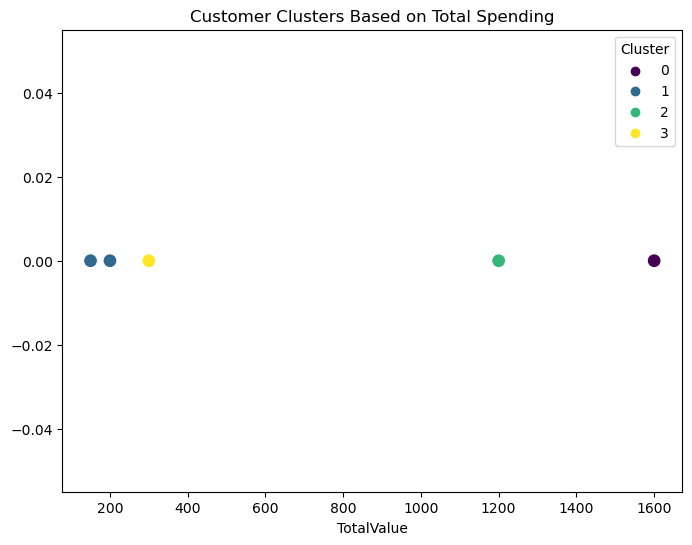

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

customers = pd.read_csv("C:/Users/dell/Downloads/Customerss.csv")
transactions = pd.read_csv("C:/Users/dell/Downloads/Transactions.csv")

customer_spending = transactions.groupby("CustomerID")["TotalValue"].sum().reset_index()
customer_data = customers.merge(customer_spending, on="CustomerID", how="left").fillna(0)

features = customer_data[["TotalValue"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

db_index = davies_bouldin_score(scaled_features, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_data, x="TotalValue", y=[0]*len(customer_data), hue="Cluster", palette="viridis", s=100)
plt.title("Customer Clusters Based on Total Spending")
plt.show()
